In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_c= df.drop(['Product Name','Product Category','Month','Year', 'Market Size', 'Marketing Expense','Month No.'],axis=1)

In [4]:
sales_c.shape

(60, 1)

In [5]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_c['Sales'].sum()

45599092

Text(0.5, 1.0, 'Product C')

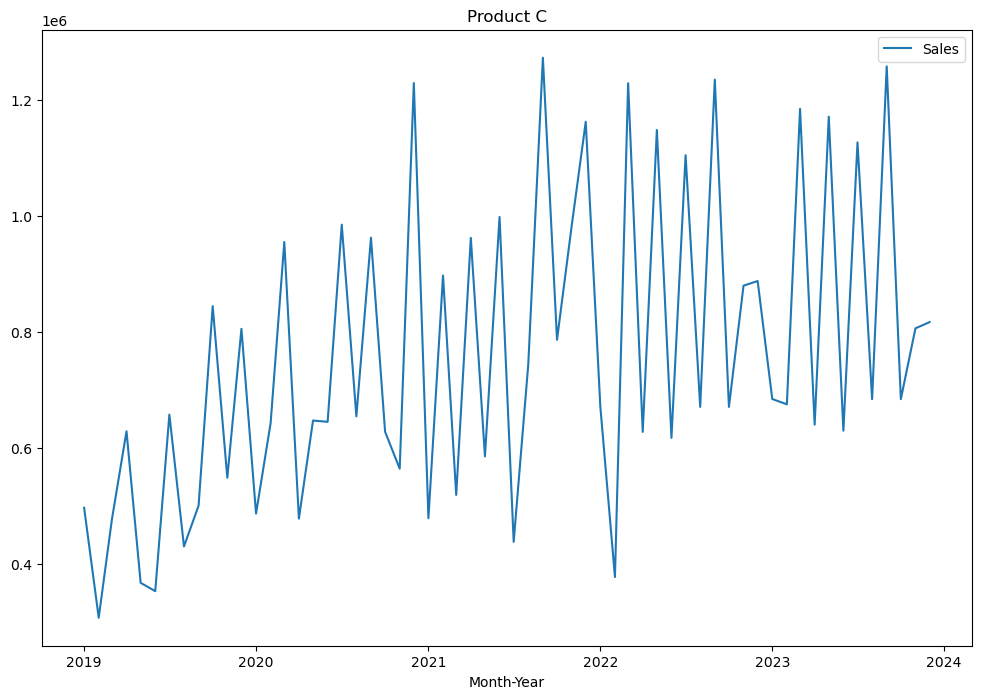

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(sales_c)

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


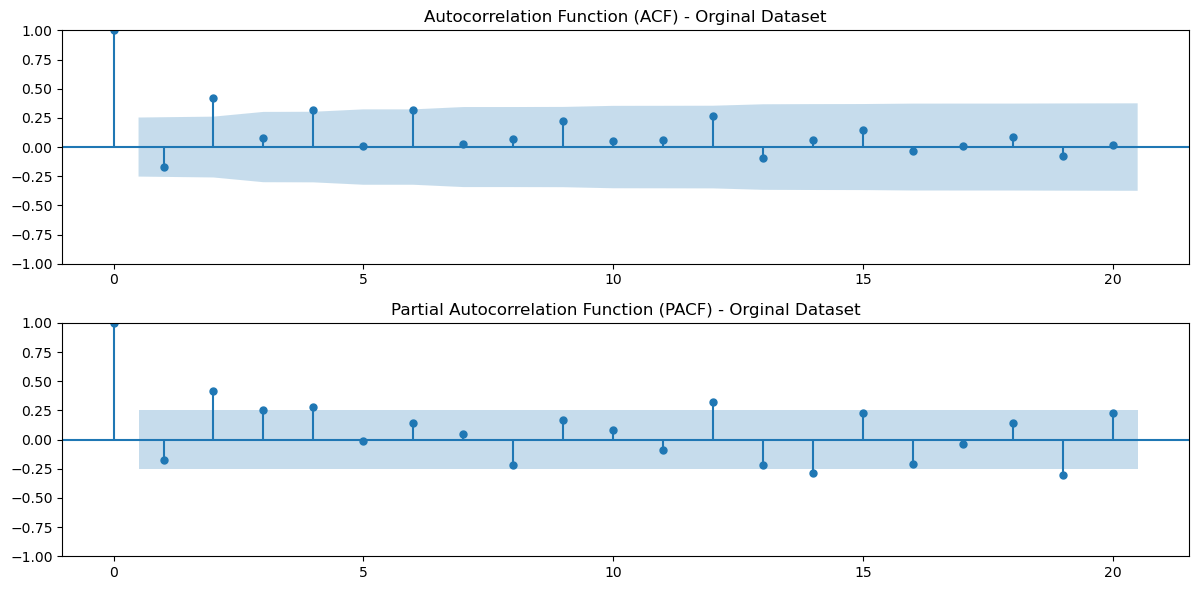

In [10]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [11]:
train= sales_c[:48]
test=sales_c[48:]

In [12]:
len(train)

48

In [13]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [14]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
7   2  1  1328.598449  1337.954454  207458.307440  5.655925e+10  237821.878775
5   1  2  1328.763514  1338.119519  208871.834089  5.658466e+10  237875.305788
8   2  2  1329.743465  1340.970671  207501.586246  5.635329e+10  237388.472834
10  3  1  1330.100498  1341.327704  206612.544869  5.631974e+10  237317.797196
12  4  0  1330.576875  1341.804081  197416.268964  5.660998e+10  237928.517724
11  3  2  1331.217256  1344.315663  271218.084411  9.652258e+10  310680.837251
13  4  1  1331.438931  1344.537338  207422.850321  5.592522e+10  236485.140864
15  5  0  1332.404430  1345.502838  201434.335535  5.773493e+10  240280.935890
9   3  0  1332.924184  1342.280189  204405.196697  6.768259e+10  260158.787868
14  4  2  1333.157500  1348.127108  201404.125627  5.278676e+10  229753.697919
16  5  1  1333.297057  1348.266665  204811.244684  5.474674e+10  233980.207950
17  5  2  1335.090294  1351.931103  199346.137912  5

In [15]:
#combination p=(0,1,2,3,4,5) d=0 q=(0,1,2) must be tested with accuracy metrics and aic

In [16]:
#param = [(0,0,0),(0,0,1),(0,0,2),(1,0,0),(1,0,1),(1,0,2),(2,0,0), (2,0,1), (2,0,2),(3,0,0),(3,0,1),(3,0,2),(4,0,0),(4,0,1),(4,0,2),(5,0,0),(5,0,1),(5,0,2)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [17]:
m_arima= ARIMA (train, order=(2,0,1))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -659.299
Date:                Thu, 09 May 2024   AIC                           1328.598
Time:                        15:53:05   BIC                           1337.954
Sample:                    01-01-2019   HQIC                          1332.134
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.341e+05   1.94e+05      3.789      0.000    3.54e+05    1.11e+06
ar.L1          0.4708      0.207      2.273      0.023       0.065       0.877
ar.L2          0.4896      0.175      2.803      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

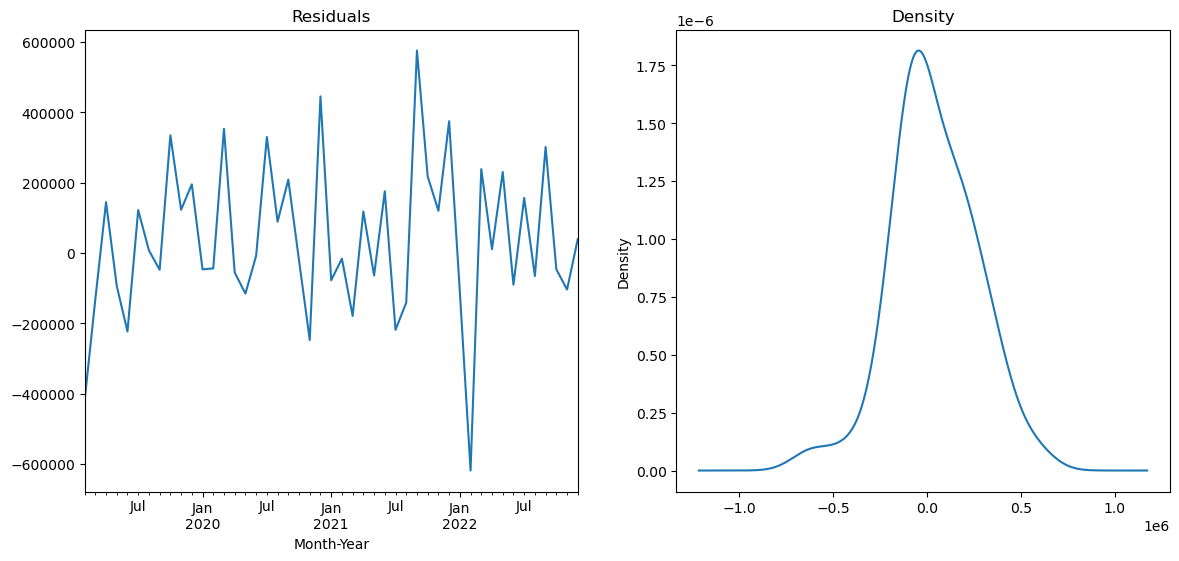

In [18]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show

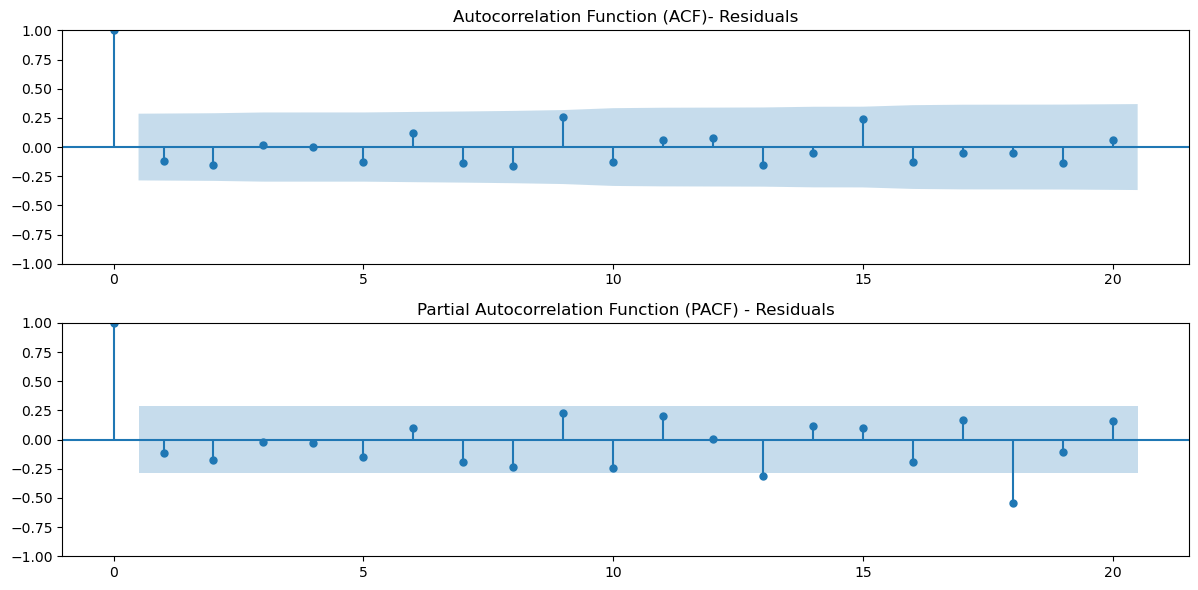

In [19]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

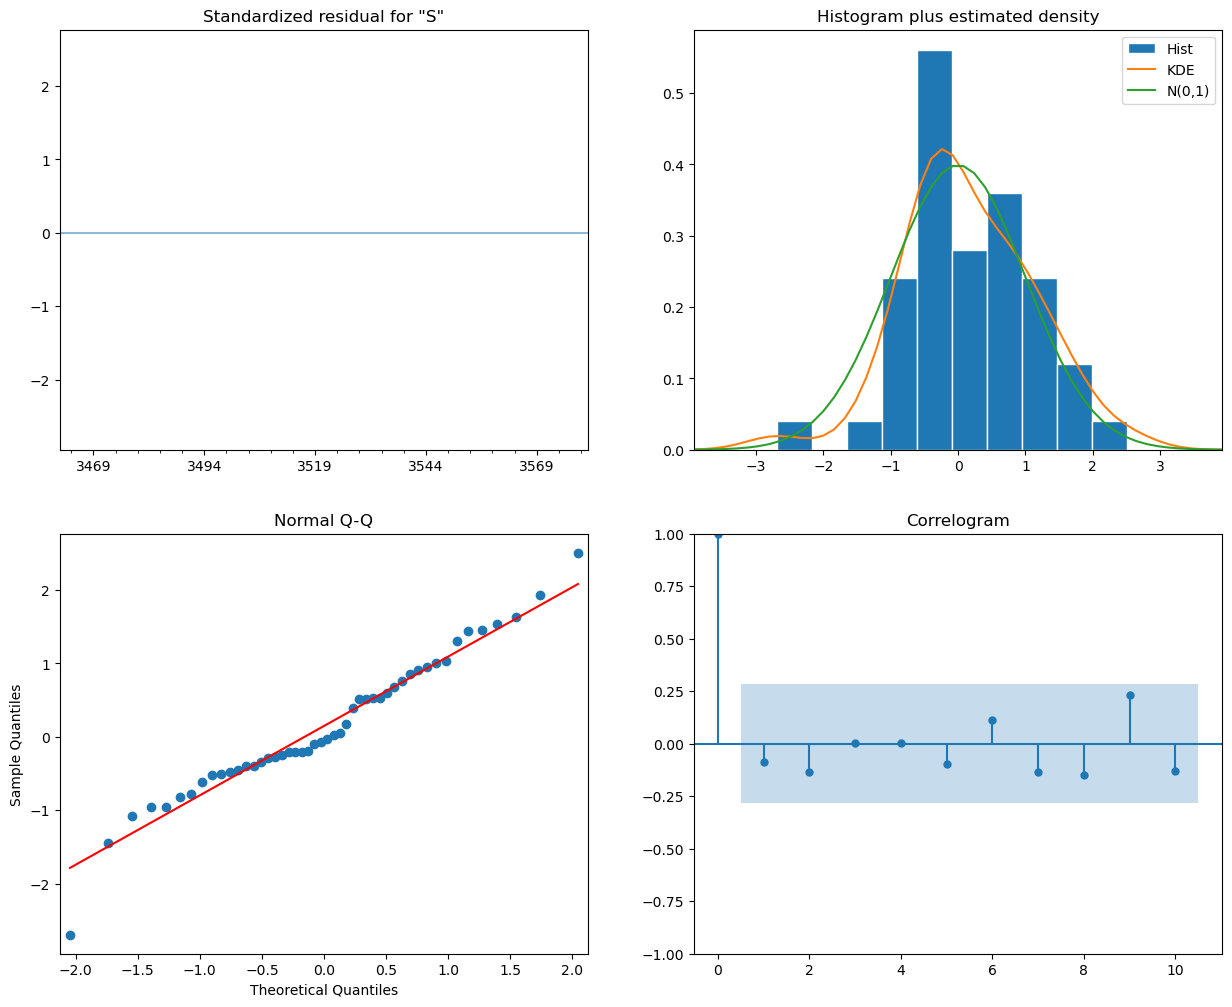

In [20]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
#pred=model.forecast(steps= len(test))
#sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_c.plot()

In [22]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), dynamic = True)
sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)

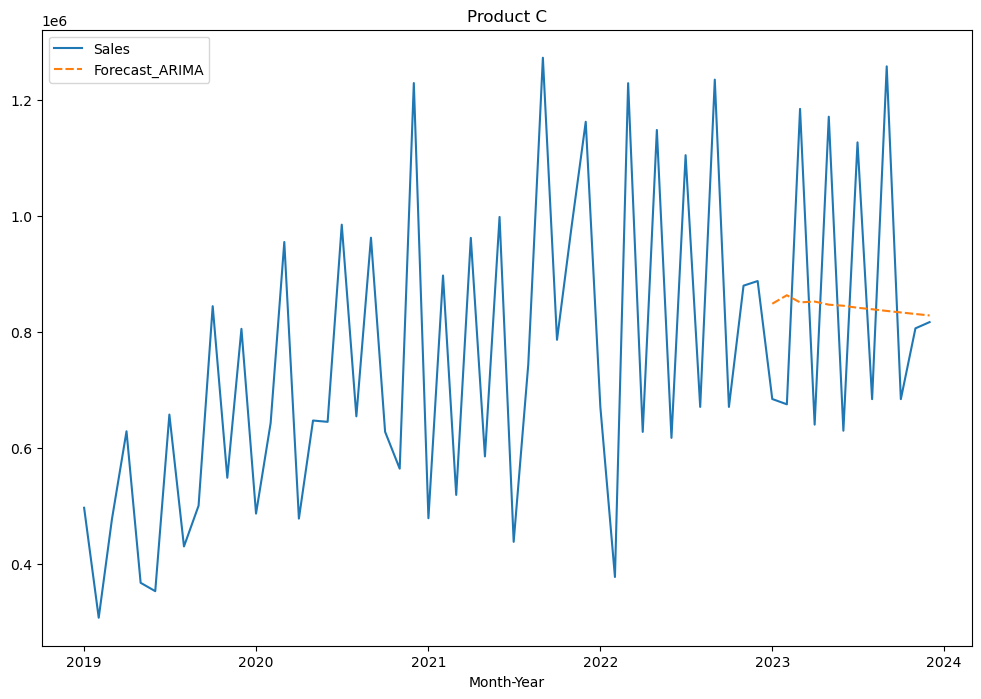

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMA']])
plt.title('Product C')
plt.show()

In [24]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 207458.30743956834
MAPE - ARIMA: 0.2361141327060997
MSE - ARIMA: 56559246024.13094
RMSE - ARIMA: 237821.87877512645


# FORECASTING

In [29]:
f_arima= ARIMA(sales_c['Sales'],order=(2,0,1))
model_f_arima=f_arima.fit()

In [30]:
forecast_=model_f_arima.predict(start=len(sales_c), end=(len(sales_c)+11), dynamic = True)

In [31]:
forecast_

2024-01-01    869772.469708
2024-02-01    837680.612489
2024-03-01    852388.648260
2024-04-01    841393.957470
2024-05-01    844612.258344
2024-06-01    840066.202846
2024-07-01    839854.348492
2024-08-01    837314.433362
2024-09-01    836113.188828
2024-10-01    834230.637351
2024-11-01    832777.704798
2024-12-01    831141.590901
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Product C')

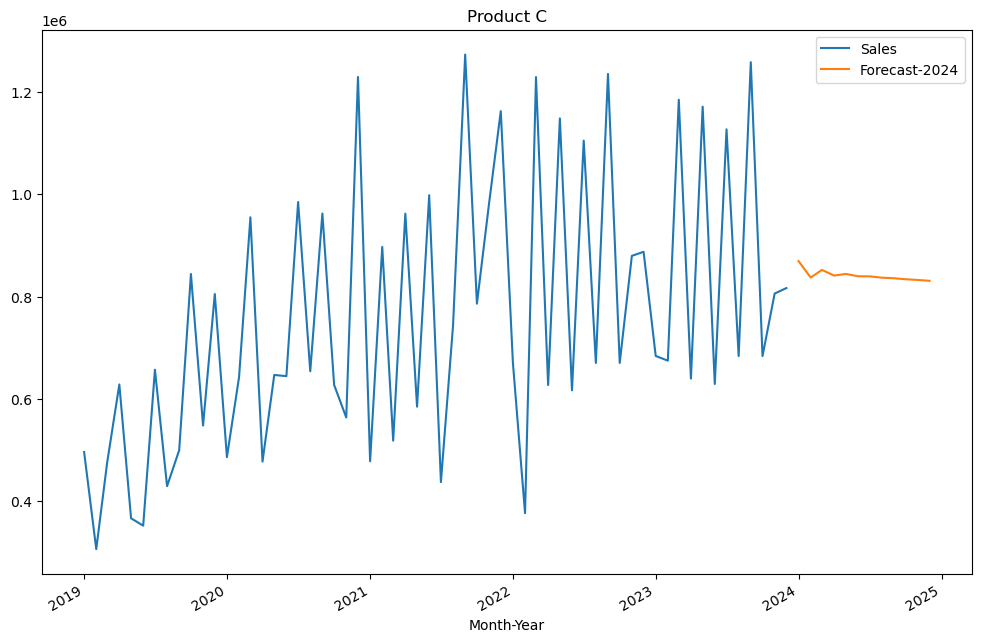

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales']])
forecast_.plot(legend=True, label='Forecast-2024')
plt.title('Product C')

# SARIMA

In [27]:
import statsmodels.api as sm

In [26]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_c['Sales'], label='Original Series')
#axes[0].plot(sales_c['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_c['Sales'], label='Original Series')
#axes[1].plot(sales_c['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product C', fontsize=16)
#plt.show()

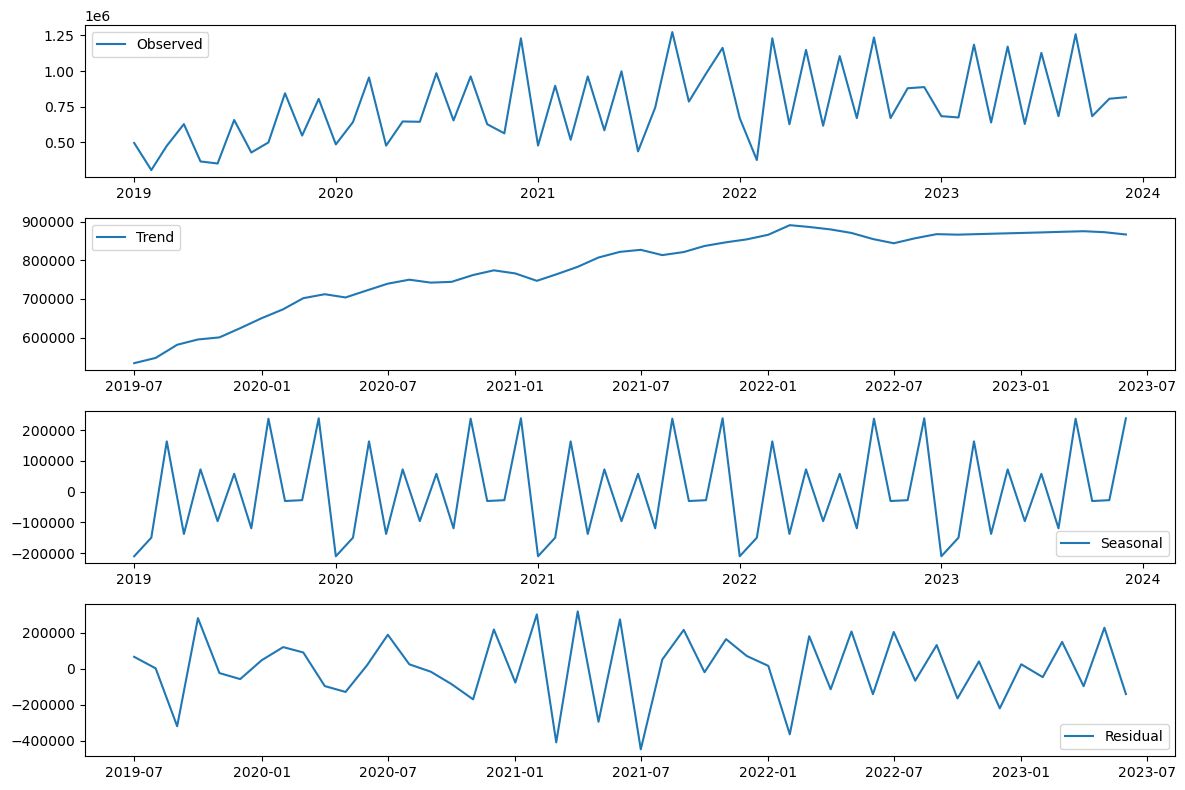

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

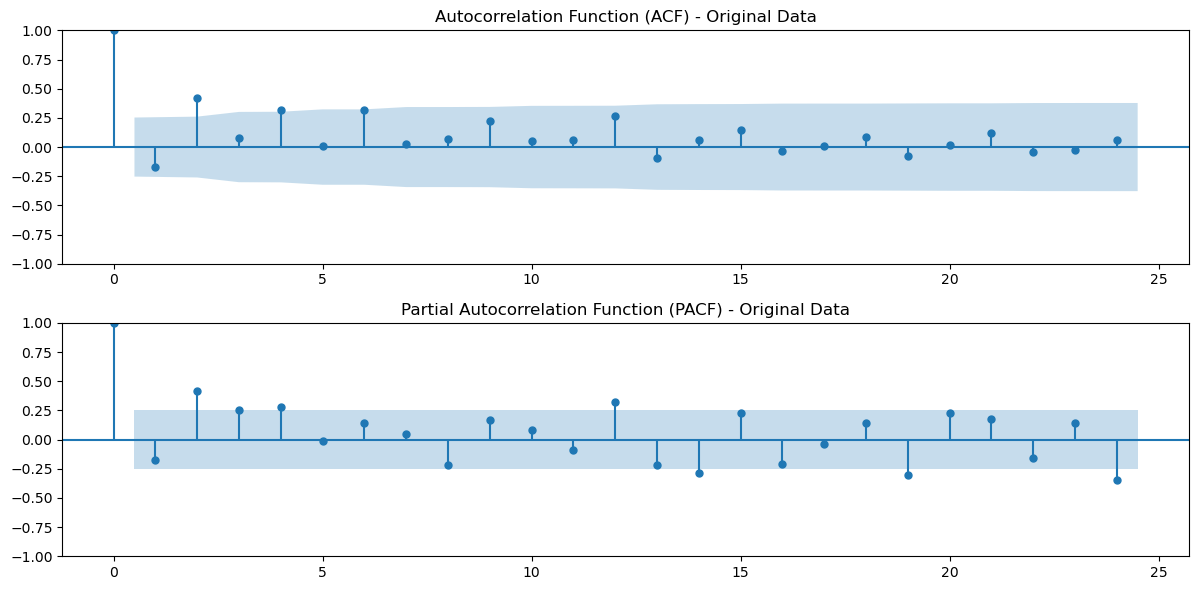

In [29]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [30]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(2, 0, 1), seasonal_order=(P, 0, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [31]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
0   0  0  1330.503203  1337.988007  213629.034396  5.584336e+10
3   1  0  1331.814782  1341.170788  175793.175327  3.961039e+10
1   0  1  1331.993927  1341.349932  184251.735554  4.313076e+10
6   2  0  1332.705451  1343.932657  203046.065298  4.883232e+10
2   0  2  1332.799618  1344.026824  204041.505894  5.105141e+10
4   1  1  1333.111040  1344.338246  181344.365807  3.890045e+10
9   3  0  1334.698862  1347.797269  203034.921594  4.829169e+10
7   2  1  1334.699397  1347.797804  203092.887354  4.835233e+10
5   1  2  1334.703756  1347.802164  201316.385238  4.742992e+10
8   2  2  1336.697231  1351.666839  202719.026835  4.816968e+10
12  4  0  1336.697966  1351.667574  202774.557347  4.823011e+10
10  3  1  1336.698779  1351.668387  203015.890029  4.828240e+10
11  3  2  1338.697768  1355.538577  202789.847321  4.822611e+10
13  4  1  1338.698134  1355.538943  202779.536794  4.822681e+10
14  4  2  1340.699543  1359.411553  2026

In [32]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(2, 0, 1),seasonal_order=(0,0,0,12))
sarima_model=sarima.fit()

In [33]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -661.252
Date:                Thu, 09 May 2024   AIC                           1330.503
Time:                        15:57:24   BIC                           1337.988
Sample:                    01-01-2019   HQIC                          1333.332
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4939      0.193      2.559      0.010       0.116       0.872
ar.L2          0.5035      0.191      2.634      0.008       0.129       0.878
ma.L1         -0.7456      0.148     -5.022      0.000      -1.037      -0.455
sigma2       6.07e+10   2.38e-12   2.55e+22      0.000    6.07e+10    6.07e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.26   Prob(JB):                         0.18
Heteroskedasticity (H):               2.26   Skew:                            -0.22
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+39. Standard errors may be unstable.
"""

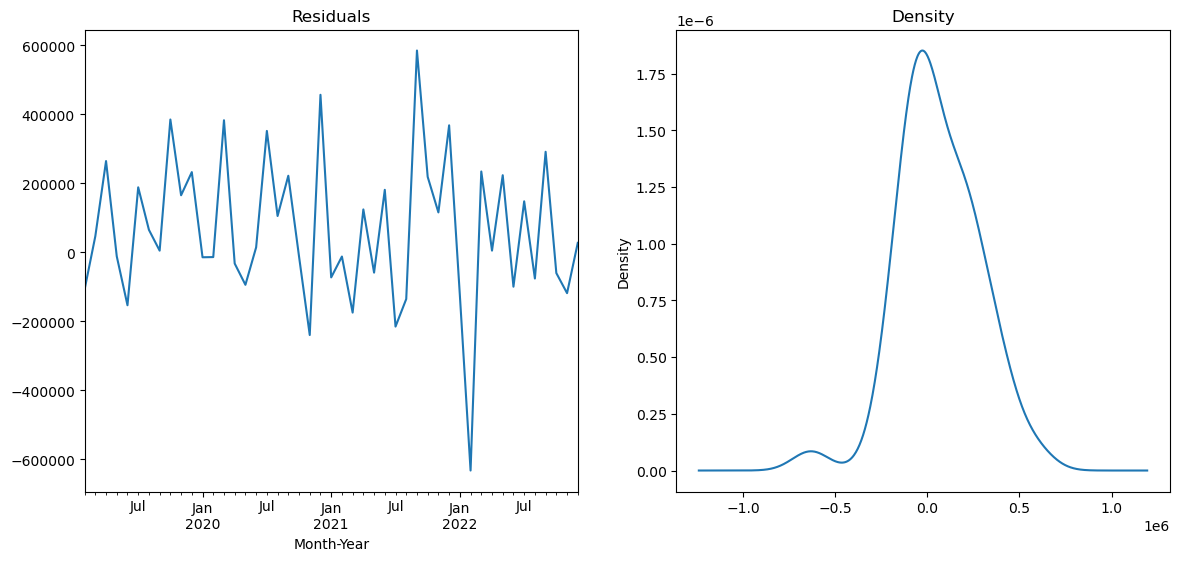

In [34]:
residuals_s= sarima_model.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals_s.plot(title='Residuals',ax=ax[0])
residuals_s.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

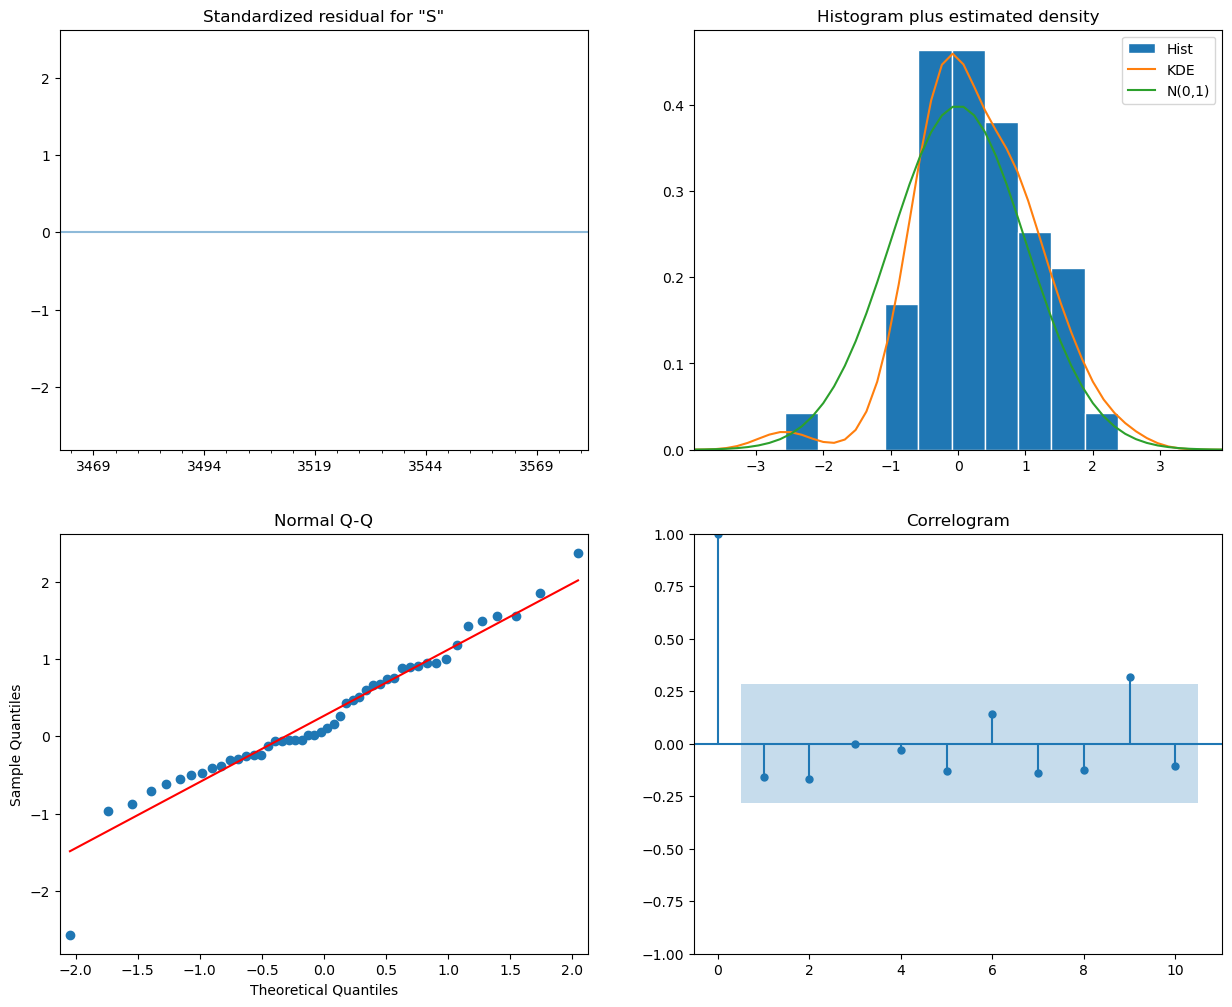

In [35]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [36]:
forecast_test_sarima=sarima_model.predict(start=48,end=59,dynamic=True)

In [37]:
sales_c['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

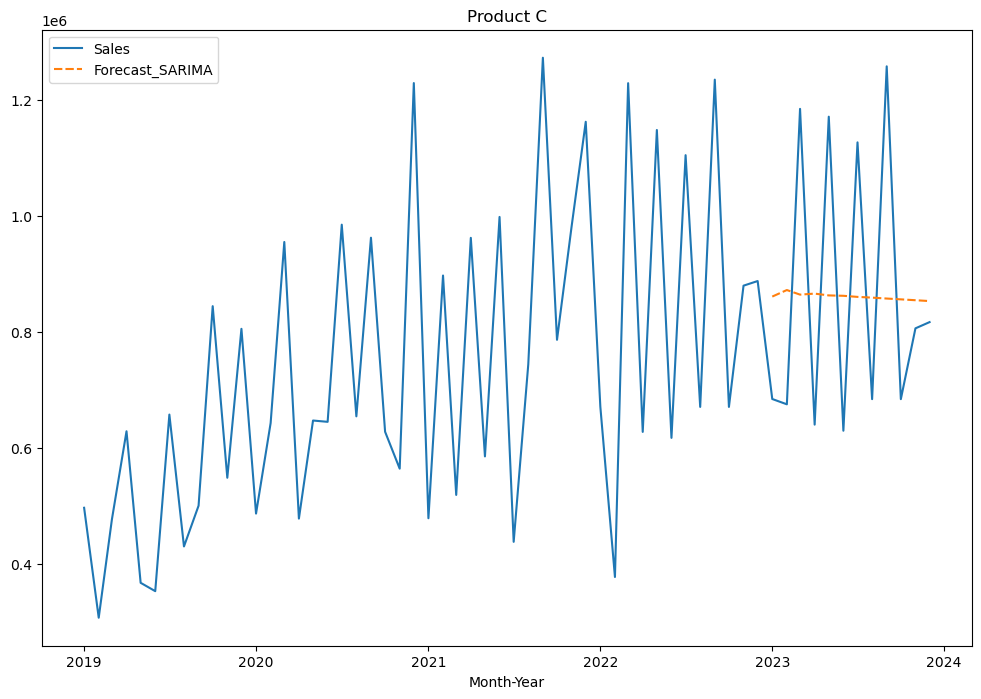

In [38]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMA']])
plt.title('Product C')

In [39]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 213629.034
MAPE - SARIMA: 0.248
MSE - SARIMA: 55843364582.395
RMSE - SARIMA: 236312.007


# FORECASTING

In [44]:
sarima_forecast=sm.tsa.statespace.SARIMAX(sales_c['Sales'],order=(2, 0, 1),seasonal_order=(0,1,1,12))
sarima_model_f=sarima_forecast.fit()

In [45]:
forecast_sarima=sarima_model_f.predict(start=60,end=71,dynamic=True)

In [46]:
forecast_sarima

2024-01-01    7.925914e+05
2024-02-01    5.943648e+05
2024-03-01    1.160348e+06
2024-04-01    6.811179e+05
2024-05-01    1.096155e+06
2024-06-01    6.884009e+05
2024-07-01    1.057418e+06
2024-08-01    7.077219e+05
2024-09-01    1.244353e+06
2024-10-01    7.191711e+05
2024-11-01    8.500519e+05
2024-12-01    9.146701e+05
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Product C')

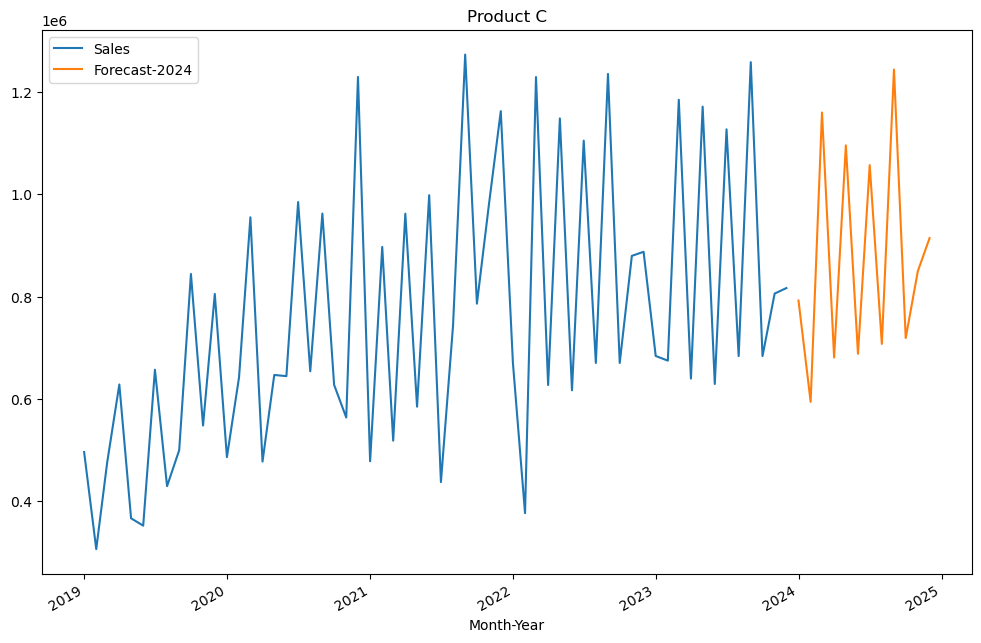

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales']])
forecast_sarima.plot(legend=True, label='Forecast-2024')
plt.title('Product C')

In [49]:
sarima_forecast_model=sarima_model_f.get_forecast(steps=12)

In [50]:
mean_forecast_sarima= sarima_forecast_model.predicted_mean
dates = mean_forecast_sarima.index

In [51]:
confidence_intervals_sarima= sarima_forecast_model.conf_int()

In [52]:
print(mean_forecast_sarima,confidence_intervals_sarima)

2024-01-01    7.925914e+05
2024-02-01    5.943648e+05
2024-03-01    1.160348e+06
2024-04-01    6.811179e+05
2024-05-01    1.096155e+06
2024-06-01    6.884009e+05
2024-07-01    1.057418e+06
2024-08-01    7.077219e+05
2024-09-01    1.244353e+06
2024-10-01    7.191711e+05
2024-11-01    8.500519e+05
2024-12-01    9.146701e+05
Freq: MS, Name: predicted_mean, dtype: float64               lower Sales   upper Sales
2024-01-01  293053.849732  1.292129e+06
2024-02-01   50470.362150  1.138259e+06
2024-03-01  586109.076287  1.734586e+06
2024-04-01  105344.500120  1.256891e+06
2024-05-01  514409.250536  1.677900e+06
2024-06-01  106551.012118  1.270251e+06
2024-07-01  473444.877473  1.641392e+06
2024-08-01  123156.877377  1.292287e+06
2024-09-01  658566.537985  1.830139e+06
2024-10-01  132631.384684  1.305711e+06
2024-11-01  262601.741749  1.437502e+06
2024-12-01  326481.261758  1.502859e+06


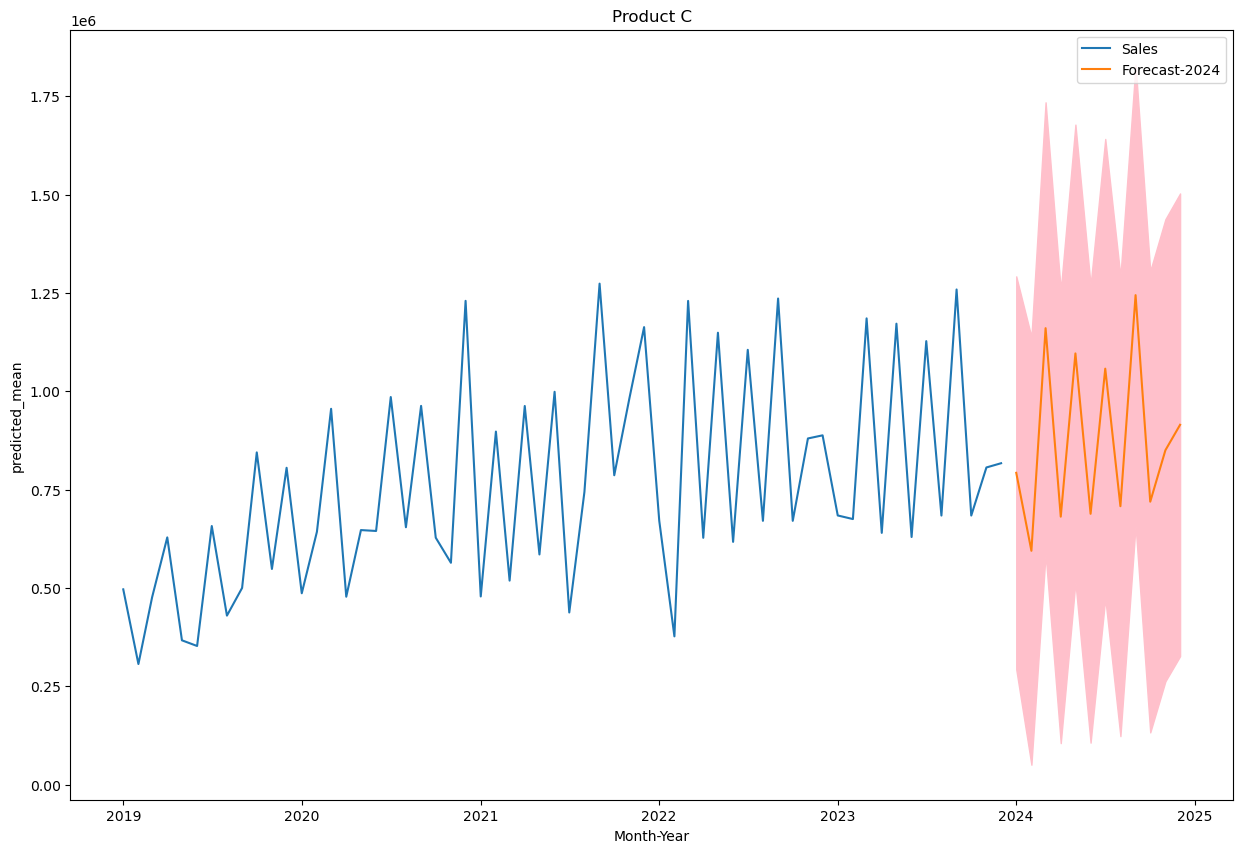

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_c[['Sales']])
sns.lineplot(data=mean_forecast_sarima, label='Forecast-2024')
plt.fill_between(x=mean_forecast_sarima.index, y1=confidence_intervals_sarima['lower Sales'], y2=confidence_intervals_sarima['upper Sales'], color='pink')
plt.title('Product C')
plt.show()

# AUTO-ARIMA

In [41]:
import pmdarima as pm

In [42]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1338.547, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1340.171, Time=0.04 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1341.240, Time=0.08 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1342.833, Time=0.44 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1340.510, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1342.170, Time=0.17 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1343.223, Time=0.13 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1344.795, Time=0.50 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1342.503, Time=0.13 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1343.148, Time=0.26 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1345.120, Time=0.96 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1346.794, Time=1.07 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1342.855, Time=0.58 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1344.772, Time=0.94 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1346.769, Time=0.91

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [43]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -659.892
Date:                Thu, 09 May 2024   AIC                           1331.785
Time:                        15:59:44   BIC                           1343.012
Sample:                    01-01-2019   HQIC                          1336.028
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.755e+05   1.48e+05      2.543      0.011    8.61e+04    6.65e+05
ar.L1         -0.2924      0.174     -1.677      0.094      -0.634       0.049
ar.L2          0.2347      0.118      1.985      0.047       0.003       0.466
ar.L3          0.2943      0.123      2.394      0.017       0.053       0.535
ar.L4          0.2513      0.171      1.466      0.143      -0.085       0.587
sigma2       4.68e+10      0.093   5.06e+11      0.000    4.68e+10    4.68e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.86   Prob(JB):                         0.97
Heteroskedasticity (H):               1.92   Skew:                             0.09
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+28. Standard errors may be unstable.
"""

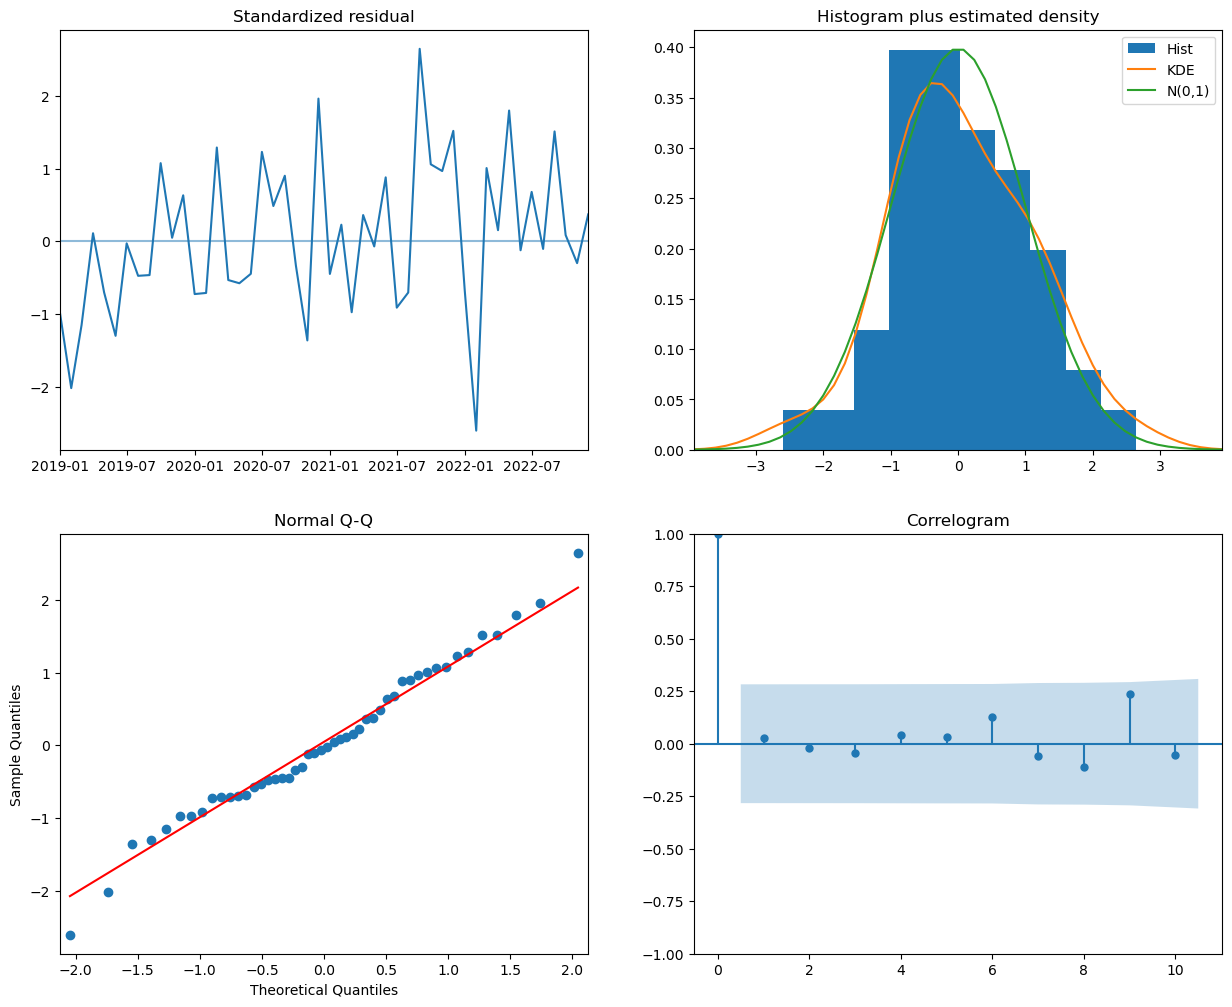

In [47]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [48]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_c[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

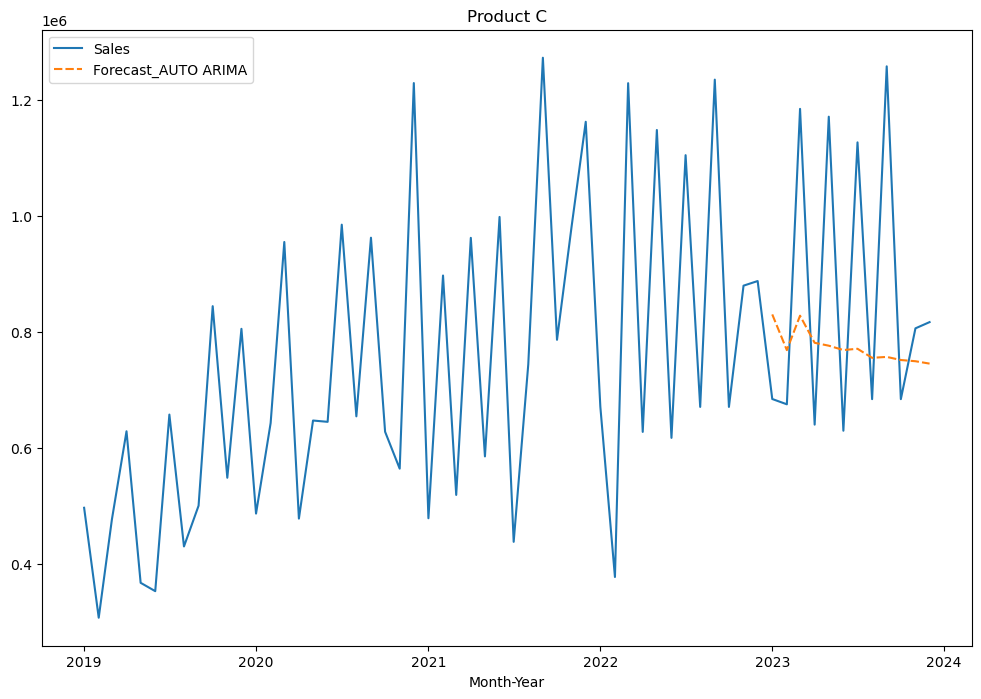

In [49]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product C')

In [50]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 199889.33953507568
MAPE - AUTO ARIMA: 0.20911614606758322
MSE - AUTO ARIMA: 62532689047.828156
RMSE - AUTO ARIMA: 250065.36954930035


In [49]:
sales_c.tail(12)

,Sales,Forecast_ARIMA,sales_s_dif,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,,
2023-01-01,684175,848715.982358,13415.0,8.622776e+05,8.974861e+05
2023-02-01,675038,863371.822947,298247.0,5.640884e+05,7.033598e+05
2023-03-01,1185258,851077.677233,-44379.0,1.108571e+06,1.216773e+06
2023-04-01,639923,852465.932379,12548.0,7.662603e+05,9.187245e+05
2023-05-01,1171761,847099.829431,22976.0,9.956916e+05,1.130172e+06
2023-06-01,629400,845253.343037,12341.0,7.852598e+05,9.575809e+05
2023-07-01,1127413,841756.625513,22106.0,9.747155e+05,1.148585e+06
2023-08-01,683935,839206.352276,13411.0,7.548132e+05,9.422132e+05
2023-09-01,1258717,836293.628343,22975.0,1.230044e+06,1.381655e+06


In [50]:
sales_c.mean()

Sales                  7.599849e+05
Forecast_ARIMA         8.432007e+05
sales_s_dif            8.231862e+04
Forecast_SARIMA        8.996197e+05
Forecast_AUTO ARIMA    1.055910e+06
dtype: float64

In [51]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,207458.307440,0.236114,5.655925e+10,237821.878775
AUTO ARIMA,199278.574464,0.271109,5.932151e+10,243560.075705
SEASONAL ARIMA,126903.139740,0.159870,1.909372e+10,138180.043082


# TESTING

In [15]:
auto_arima_1= pm.auto_arima(train, start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1349.237, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1351.027, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1352.324, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1350.979, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1352.392, Time=0.16 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1354.210, Time=0.28 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1352.267, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1354.210, Time=0.27 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1356.209, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1317.151, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1319.078, Time=0.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1320.413, Time=0.24 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1318.277, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIM

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [16]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -645.629
Date:                Wed, 08 May 2024   AIC                           1299.258
Time:                        18:37:54   BIC                           1306.659
Sample:                    01-01-2019   HQIC                          1302.043
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.03e+04   1.11e+04      2.729      0.006    8539.484    5.21e+04
ar.L1         -0.5673      0.150     -3.787      0.000      -0.861      -0.274
ma.L1         -0.7461      0.139     -5.383      0.000      -1.018      -0.474
sigma2       5.25e+10      0.006   8.38e+12      0.000    5.25e+10    5.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.80   Prob(JB):                         0.09
Heteroskedasticity (H):               2.61   Skew:                            -0.44
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+28. Standard errors may be unstable.
"""

In [18]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

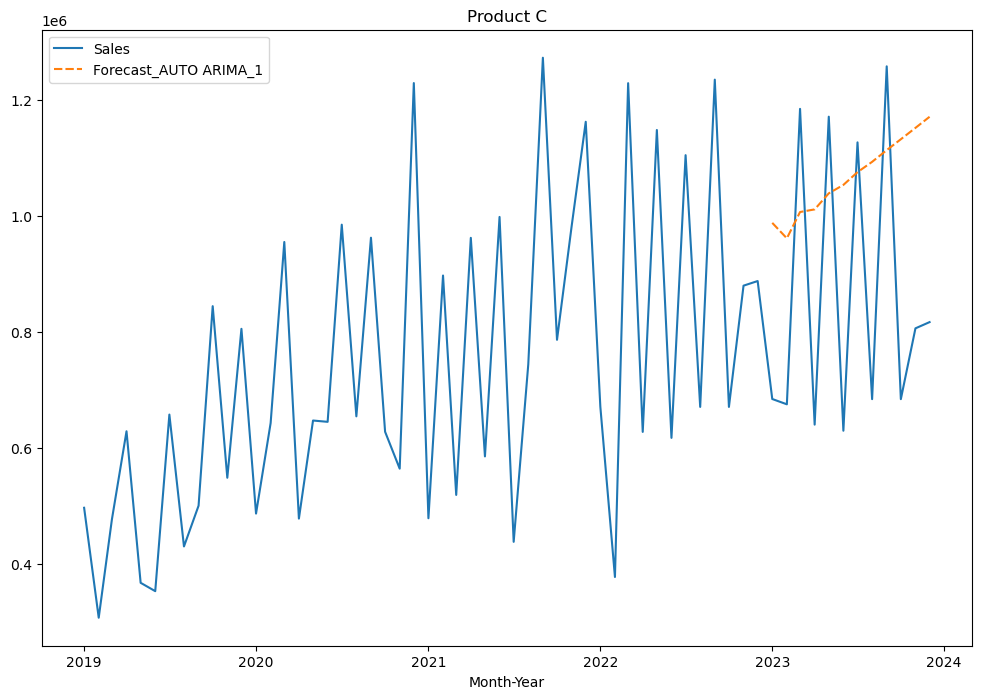

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [20]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 287776.2171141219
MAPE - AUTO ARIMA: 0.3889602560690184
MSE - AUTO ARIMA: 98416798538.3998
RMSE - AUTO ARIMA: 313714.517576729
